<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Introduction</a></span></li></ul></li><li><span><a href="#Presentation-Video" data-toc-modified-id="Presentation-Video-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Presentation Video</a></span><ul class="toc-item"><li><span><a href="#Datasets" data-toc-modified-id="Datasets-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Datasets</a></span></li><li><span><a href="#Imports-and-load-data" data-toc-modified-id="Imports-and-load-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Imports and load data</a></span></li><li><span><a href="#Data-cleaning-and-transformation" data-toc-modified-id="Data-cleaning-and-transformation-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Data cleaning and transformation</a></span></li><li><span><a href="#Hypothesis-Test" data-toc-modified-id="Hypothesis-Test-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Hypothesis Test</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li></ul></div>

### Introduction

<I> Description: </I> <br>
In this project we will analyze and compare based on centrality measures across a social network comprised of over 6,000 Marvel characters.  The centrality measures used are degree centrality and eigenvector centrality.  Our primary objectives are to assess... <br>
1. Are male characters more popular than female characters (popularity will be based on number of connections)? <br>
2. Is there a greater prevalence of male characters in Marvel comics?
<br>

<I> Approach: </I>
1. for each node in the dataset calculate degree centrality and eigenvector centrality. <br>
2. compute the average degree and eigenvector centrality for each gender <br>
3. run t-tests comparing the genders to assess if there is a statistically significant difference for the above objectives


<I> Degree Centrality </I>is one of the easiest measures to calculate. The degree centrality of a node is simply its degree—the number of edges it has. The higher the degree, the more central the node is. This can be an effective measure, since many nodes with high degrees also have high centrality by other measures. <br>

<I> Eigenvector Centrality </I>is a measure of the influence a node has on a network. If a node is pointed to by many nodes (which also have high eigenvector centrality) then that node will have high eigenvector centrality.

## Presentation Video

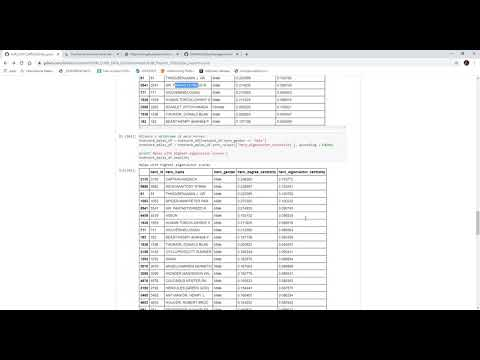

In [1]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('2W_ozIt9wHc', width=800, height=300)

Direct YouTube: https://youtu.be/2W_ozIt9wHc

### Datasets

The datasets used for this analysis are: <br>
1. <I>Kaggle’s Marvel Universe Social Network </I> [link to site](https://www.kaggle.com/csanhueza/the-marvel-universe-social-network) This is our primary dataset, providing files of nodes and edges. <br><br>
2. <I> Five-Thirty-Eight’s Comic Characters </I> [link to site](https://github.com/fivethirtyeight/data/tree/master/comic-characters).  This dataset was originally used for a story called “Comic Books are Still Made by Men…” and appears to have been derived from the [Marvel Fandom site](https://marvel.fandom.com/wiki/Category:Characters_by_Gender). We use this dataset to identify the agenda of each super hero.

### Imports and load data

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy import stats
import math

import warnings
warnings.filterwarnings('ignore')

pd.set_option('Display.max_columns', None)
pd.set_option('Display.max_rows', None)

In [3]:
%cd /Users/williesmalls/Documents/School/CUNY\ SPS/01\ -\ Courses/00\ -\ Web\ Analytics/KJW_CUNY_DATA_620/KJW_Project1_DS620

[WinError 3] The system cannot find the path specified: '/Users/williesmalls/Documents/School/CUNY\\ SPS/01\\ -\\ Courses/00\\ -\\ Web\\ Analytics/KJW_CUNY_DATA_620/KJW_Project1_DS620'
C:\Users\user\Documents\00_Applications_DataScience\CUNY\DATA620\KJW_CUNY_DATA_620\KJW_Project1_DS620


In [4]:
#data load
hnetwork_in = pd.read_csv('hero-network.csv')
hgender_in = pd.read_csv('marvel_heroe_with_gender_list.csv')

FileNotFoundError: [Errno 2] File hero-network.csv does not exist: 'hero-network.csv'

In [ ]:
#review top 5 
hnetwork_in.head(3)

In [ ]:
hnetwork_in.tail(3)

In [ ]:
hgender_in.head(3)

In [ ]:
hgender_in.tail(3)

### Data cleaning and transformation

In [ ]:
#Create a dictionary keyed by hero name and value is gender.  This dictionary is used in the next step to
#help create a dataframe of each hero's name and gender, with a unique hero id.
gender_dict = defaultdict(list)

for r in hgender_in.values:
    key = r[0]
    gender_dict[key] = r[2]

In [ ]:
#This step will create a dataframe that lists each superhero and assigns a unique id to each.  The heroe's gender will also be 
#a column in the dataframe. The id's will serve as node ids for the graph. 

#combine the hero1 and hero2 columns into one set of unique hero names
hero1_list = hnetwork_in['hero1'].tolist()
hero2_list = hnetwork_in['hero2'].tolist()

all_heroes_list = hero1_list + hero2_list

#use set to remove duplicates
hnetwork_set = set(all_heroes_list)  
hnetwork_list = list(hnetwork_set)

#use dataframe to generate a unique id for each name
hnetwork_df = pd.DataFrame()    
hnetwork_df['hero_name'] = hnetwork_list
hnetwork_df.index.name = 'hero_id'
hnetwork_df = hnetwork_df.reset_index()

#loop thru the dataframe and get the heroes gender from the gender dictionary
hero_gender_list = []
for r in hnetwork_df.values:
    hero_gender = gender_dict.get(r[1])
    hero_gender_list.append(hero_gender)

hnetwork_df['hero_gender'] = hero_gender_list

hnetwork_df.head(3)

In [ ]:
hnetwork_df.tail(3)

In [ ]:
#create a hero id's dictionary keyed by name with id as value.  This dictionary will be used to the next step to add hero1_nodeId's
#hero2_nodeids to hero network dataframe.
hero_ids_dict = defaultdict(list)

for r in hnetwork_df.values:
    key = r[1]
    hero_ids_dict[key] = r[0]

In [ ]:
#loop thru the hnetwork_in dataframe and create two additional columns (hero1_id, hero2_id).  These id's 
#will be used as the node id's for the graph and centrality calculations.
hero_network_df = hnetwork_in

hero1_id_list = []
hero2_id_list = []

for r in hnetwork_in.values:
    #use the hero ids dictionary
    hero1_id = hero_ids_dict.get(r[0])
    hero1_id_list.append(hero1_id)
    
    hero2_id = hero_ids_dict.get(r[1])
    hero2_id_list.append(hero2_id)
    
hero_network_df['hero1_nodeid'] = hero1_id_list
hero_network_df['hero2_nodeid'] = hero2_id_list

print('This is a dataframe of the hero network by hero name and by hero node id...')
hero_network_df.head(3)

In [ ]:
hero_network_df.tail(3)

In [ ]:
# Load the data from the hero_network_df to a graph
g1 = nx.Graph()

# Add nodes
node_ids_list = hnetwork_df.hero_id.tolist()
g1.add_nodes_from(node_ids_list)

# Add edges
edges_list = list(zip(hero_network_df.hero1_nodeid.tolist(), hero_network_df.hero2_nodeid.tolist()))
g1.add_edges_from(edges_list)

In [ ]:
#Calculate degree centrality for each node and then add it to the hero network dataframe
heroes_degree_centrality = nx.degree_centrality(g1)

hnetwork_df['hero_degree_centrality'] = list(heroes_degree_centrality.values())

In [ ]:
#Calculate eigenvector centrality for each node and then add it to the hero network dataframe
heroes_eigenvector_centrality = nx.eigenvector_centrality(g1)

hnetwork_df['hero_eigenvector_centrality'] = list(heroes_eigenvector_centrality.values())

In [ ]:
#Write dataframe to a csv file
hnetwork_df.to_csv('heroes_network_with_centrality.csv')

In [ ]:
hnetwork_df.sort_values(['hero_degree_centrality'], ascending = False).head(10)
print('Top 10 ')

In [ ]:
#Create a dataframe of male heroes
hnetwork_males_df = hnetwork_df[hnetwork_df.hero_gender == 'Male']
hnetwork_males_df = hnetwork_males_df.sort_values(['hero_eigenvector_centrality'], ascending = False) 

print('Males with highest eigenvector scores')
hnetwork_males_df.head(20)

In [ ]:
#Create a dataframe of female heroes
hnetwork_females_df = hnetwork_df[hnetwork_df.hero_gender == 'Female']
hnetwork_females_df = hnetwork_females_df.sort_values(['hero_eigenvector_centrality'], ascending = False)

print('Females with highest eigenvector scores')
hnetwork_females_df.head(20)

### Hypothesis Test

In [ ]:
#The male and female count reveals (not surprisingly) that the male:female super hero count is skewed toward males
#by almost 3:1.
male_N = len(hnetwork_males_df.index)
female_N = len(hnetwork_females_df.index)

print('Gender counts are...')
print(f'male heroes: {male_N}')
print(f'female heroes: {female_N}')

missing_gender = len(hnetwork_df) - female_N - male_N
print(f'missing gender: {missing_gender}')

In [ ]:
#We'll respond to question #1 via a t-test.

#Hypothesis
#H0: male average eigenvector centrality = female average eigenvector centrality
#H1: male average eigenvector centrality != female average eigenvector centrality

#Data
male_mean = hnetwork_males_df.hero_eigenvector_centrality.mean()
male_std = hnetwork_males_df.hero_eigenvector_centrality.std()

female_mean = hnetwork_females_df.hero_eigenvector_centrality.mean()
female_std = hnetwork_females_df.hero_eigenvector_centrality.std()

print(f'male sample size is: {male_N}')
print(f'male mean is: {male_mean}')
print(f'male std is: {male_std}')
print()
print(f'female sample size is: {female_N}')
print(f'female mean is: {female_mean}')
print(f'female std is: {female_std}')

In [ ]:
#Run the t-test
def tcdf(value, df):
    tcdf_value = stats.t.cdf(value, df)
    return tcdf_value

def t_independent_samples_H(N1, N2, u1, u2, o1, o2):
    #the mean and std are so small that the t-value calc below errored on "divide by zero", so multiplying all values by 1000
    u1 = u1 * 1000
    u2 = u2 * 1000
    o1 = o1 * 1000
    o2 = o2 * 1000
    
    if N1 > N2:
        df = N1 - 1
    else:
        df = N2 - 1

    temp1 = o1**2/N1
    temp2 = o2**2/N2
    SE = round(math.sqrt(temp1 + temp2),3)
    
    tvalue = (u1 - u2)/SE

    pvalue = (1 - (tcdf(tvalue, df))) * 2
    pvalue = round(pvalue, 4)

    return (SE, tvalue, pvalue)

answer = t_independent_samples_H(male_N, female_N, male_mean, female_mean, male_std, female_std) #(N1, N2, u1, u2, o1, o2)
print(f'The SE, t-value, and pvalues are {answer}.')
print('Since the pvalue > 0.05, we cannot reject the null hypothesis.  Male eigenvector centrality does not appear to be significantly different than that of females')

### Conclusion

You'll recall in the introduction we had two questions we'd like to analyze... <br>
1. <I> Are male characters more popular than female characters (popularity will be based on number of connections)? </I> <br>
Per the above hypothesis test we conclude that male eigenvector centrality is not significantly different than female eigenvector centrality. <br> <br>

2. <I> Is there a greater prevalence of male characters in Marvel comics? </I> <br>
Given the above ratio of around 4,500 males and 1,600 females, the male to female ratio is almost 3:1.  Based on this we conclude that there is a greater prevalence of male characters Marvel comics.